<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px">

## Plotting timeseries and trendlines

Week 9 | Lesson 2.1.1

---

We will practice timeseries data in the context of pandas DataFrames. There are definitely oddities of how these are handled in pandas (it's not very graceful). So it is useful to get a feel for this and practice it.

We will be using a simple google trends dataset for website hits on mapquest.

---

**Load the mapquest dataset:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Import the data
df = pd.read_csv('../../assets/datasets/mapquest_google_trends.csv')
df.columns = ['week','hits']

In [5]:
df.head(7)

,week,hits
0,2004-01-04,53
1,2004-01-11,53
2,2004-01-18,54
3,2004-01-25,53
4,2004-02-01,52
5,2004-02-08,56
6,2004-02-15,56


---

**Plot the hits for the mapquest data, using pandas' `.plot()` functionality:**

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

In [4]:
df.dtypes

week    object
hits     int64
dtype: object

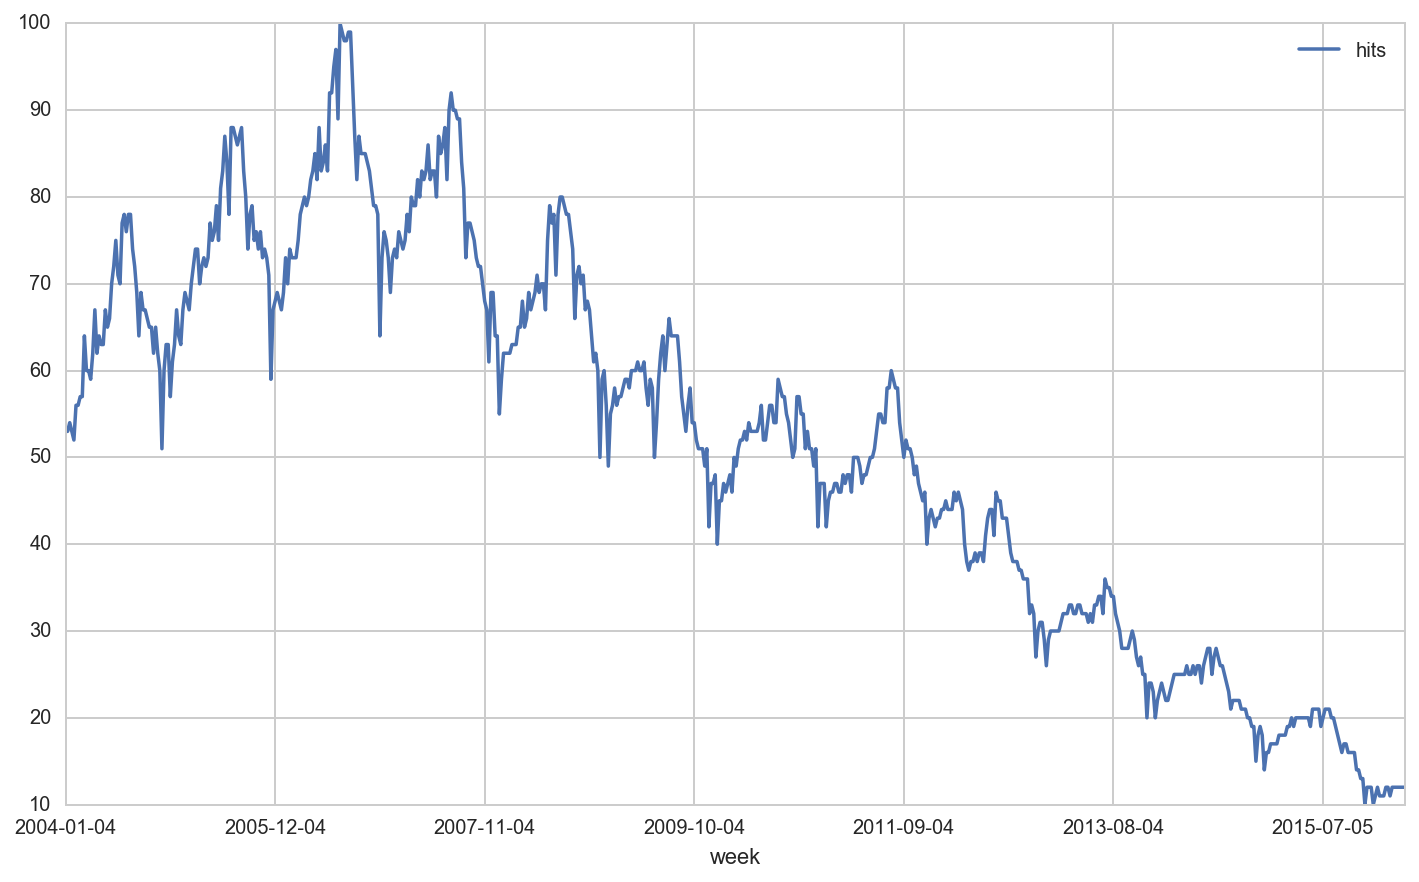

In [3]:
df.plot(figsize = (12, 7), x = 'week', y = 'hits')

---

**Use pandas `to_datetime()` to convert the date column:**

In [6]:
df.week = pd.to_datetime(df.week)

In [7]:
df.dtypes

week    datetime64[ns]
hits             int64
dtype: object

In [8]:
df.sort_values(['week'], ascending = False, inplace = True)

In [9]:
df.head(7)

,week,hits
639,2016-04-03,12
638,2016-03-27,12
637,2016-03-20,12
636,2016-03-13,12
635,2016-03-06,12
634,2016-02-28,12
633,2016-02-21,12


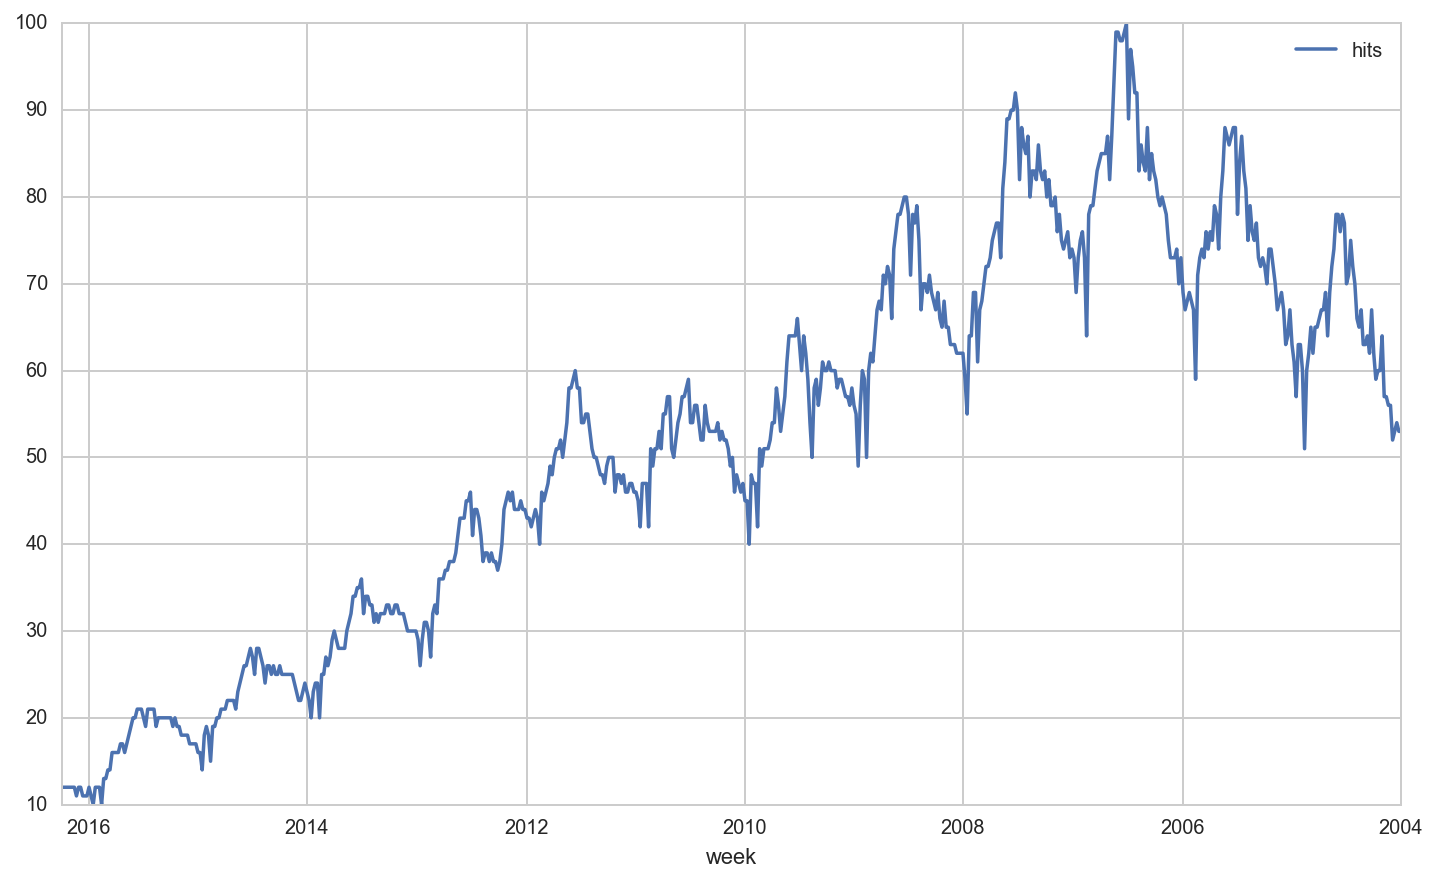

In [10]:
df.plot(figsize = (12, 7), x = 'week', y = 'hits')

In [12]:
df['year'] = df.week.dt.year
df.head(5)

,week,hits,year
639,2016-04-03,12,2016
638,2016-03-27,12,2016
637,2016-03-20,12,2016
636,2016-03-13,12,2016
635,2016-03-06,12,2016


In [17]:
df.sort_values(['week'], ascending = False, inplace = True)
df.head(5)

,week,hits,year
639,2016-04-03,12,2016
638,2016-03-27,12,2016
637,2016-03-20,12,2016
636,2016-03-13,12,2016
635,2016-03-06,12,2016


---

**Access time components using the pandas Series `dt` attribute to create date "ticks" for a plot:**

In [18]:
date_ticks = df.week.dt.to_pydatetime()
print date_ticks[0:5]
print type(date_ticks[0])

[datetime.datetime(2016, 4, 3, 0, 0) datetime.datetime(2016, 3, 27, 0, 0)
 datetime.datetime(2016, 3, 20, 0, 0) datetime.datetime(2016, 3, 13, 0, 0)
 datetime.datetime(2016, 3, 6, 0, 0)]
<type 'datetime.datetime'>


http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.html

---

**Plot the hits using the date ticks for the x-axis:**

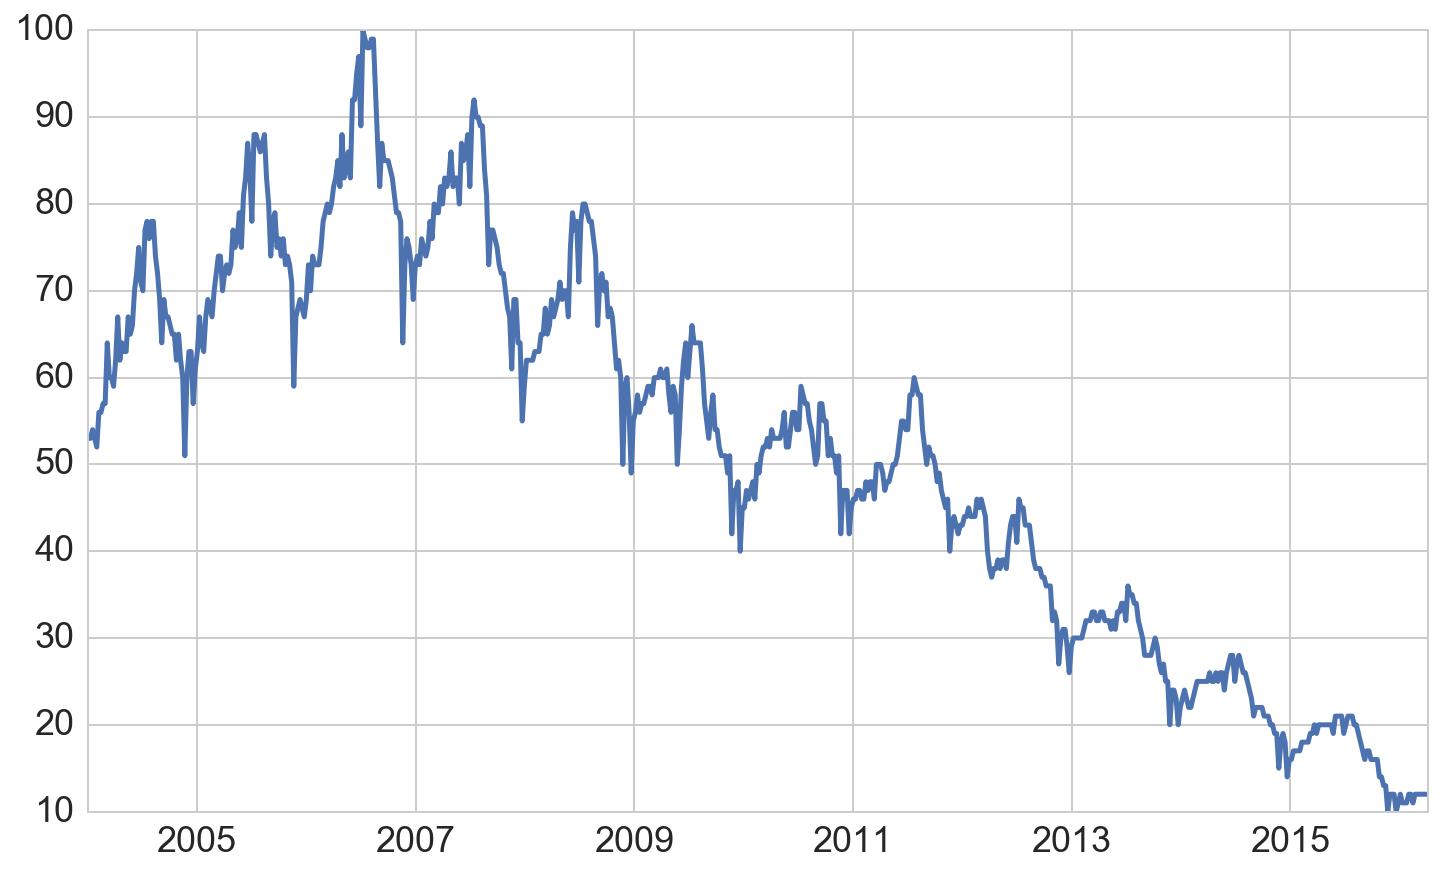

In [19]:
plt.figure(figsize = (12, 7))
plt.plot(date_ticks, df.hits, lw = 2.5)
plt.tick_params(labelsize = 18)

---

## Numpy `polyfit` and numpy `poly1d`

Numpy's functions `.polyfit()` and numpy's `.poly1d` can be used to easily plot regression lines for timeseries.

First you have to create the coefficients of the regression line using `.polyfit()`, then use numpy's `.poly1d()` to create a function that will calculate y-values using the coefficients.

http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.polyfit.html

http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.poly1d.html

---

**Create a "degree 1" (intercept and x) regression fit and function for the hits:**

In [20]:
x_axis_points = np.arange(0, df.shape[0])

In [22]:
# degree 1: hits - intercept + beta1*x
# (Equivalent to: hits - beta0*(x**0) + beta1*(x**1))

# degree 2: hits - intercept + beta1*x + beta2*(x**2)
poly_d1_coef = np.polyfit(x_axis_points, df.hits.values, deg = 1)
poly_d2_coef = np.polyfit(x_axis_points, df.hits.values, deg = 2)
poly_d3_coef = np.polyfit(x_axis_points, df.hits.values, deg = 3)

In [23]:
print poly_d1_coef
print poly_d2_coef

[  0.10841388  17.31332878]
[ -1.84964781e-04   2.26606372e-01   4.74552678e+00]


In [24]:
poly_d1 = np.poly1d(poly_d1_coef)
poly_d2 = np.poly1d(poly_d2_coef)
poly_d3 = np.poly1d(poly_d3_coef)

In [28]:
# np.poly1d() creates a regression object from coefficients that you can predict with:
print poly_d1(np.array([0, 1, 2]))

# equivalent to:
intercept = poly_d1_coef[1]
x_beta = poly_d1_coef[0]
y_pred = np.array([intercept + 0*x_beta, intercept + 1*x_beta, intercept + 2*x_beta])

print y_pred

[ 17.31332878  17.42174266  17.53015654]
[ 17.31332878  17.42174266  17.53015654]


---

**Plot the regression line through the timeseries hits data:**

---

**Create degree 1,2, and 3 regression functions, and plot them together:**